In [7]:
from skin_lesion_preprocessing import *
%matplotlib inline

In [3]:
# Initialize lists to store data
tr_image_names = []
tr_image_files = []
preprocessed_imgs = []
tr_gtruth = []

# Paths to your image directories
tr_nevus = "train/nevus"
tr_others = "train/others"

# Process all images
for nevus_img in tqdm(os.listdir(tr_nevus), desc="Nevus"):
    img_path = os.path.join(tr_nevus, nevus_img)
    original_img = np.array(load_and_resize_image(img_path))
    cropped_img = vignette_removal(original_img, threshold=50)
    hair_removed_img = remove_hair(cropped_img)
    preprocessed_imgs.append(hair_removed_img)
    tr_image_names.append(nevus_img)
    tr_image_files.append(img_path)
    tr_gtruth.append(0)

for others_img in tqdm(os.listdir(tr_others), desc="Others"):
    img_path = os.path.join(tr_others, others_img)
    original_img = np.array(load_and_resize_image(img_path))
    cropped_img = vignette_removal(original_img, threshold=50)
    hair_removed_img = remove_hair(cropped_img)
    preprocessed_imgs.append(hair_removed_img)
    tr_image_names.append(others_img)
    tr_image_files.append(img_path)
    tr_gtruth.append(1)


Others: 100%|██████████| 7470/7470 [13:24<00:00,  9.29it/s]


In [4]:
# Create a dataframe
tr_data = {
    "tr_img_name": tr_image_names,
    "tr_img_file": tr_image_files,
    "preprocessed_img": preprocessed_imgs,
    "tr_gtruth": tr_gtruth
}

tr_df = pd.DataFrame(tr_data)
tr_df = shuffle(tr_df).reset_index(drop=True)

tr_df.head()

tr_img_name                tr_img_file  \
0  mel01933.jpg  train/others\mel01933.jpg   
1  nev03107.jpg   train/nevus\nev03107.jpg   
2  bkl00049.jpg  train/others\bkl00049.jpg   
3  nev00417.jpg   train/nevus\nev00417.jpg   
4  mel01548.jpg  train/others\mel01548.jpg   

                                    preprocessed_img  tr_gtruth  
0  [[[182, 150, 159], [182, 151, 159], [180, 149,...          1  
1  [[[144, 144, 148], [143, 143, 148], [144, 144,...          0  
2  [[[142, 108, 105], [140, 106, 104], [141, 107,...          1  
3  [[[223, 134, 144], [226, 136, 147], [228, 138,...          0  
4  [[[128, 104, 94], [128, 102, 94], [128, 104, 9...          1

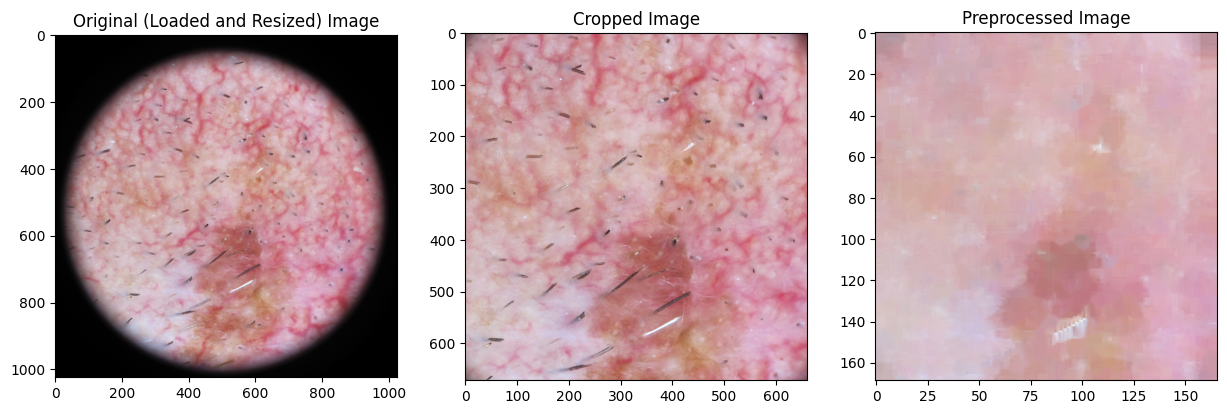

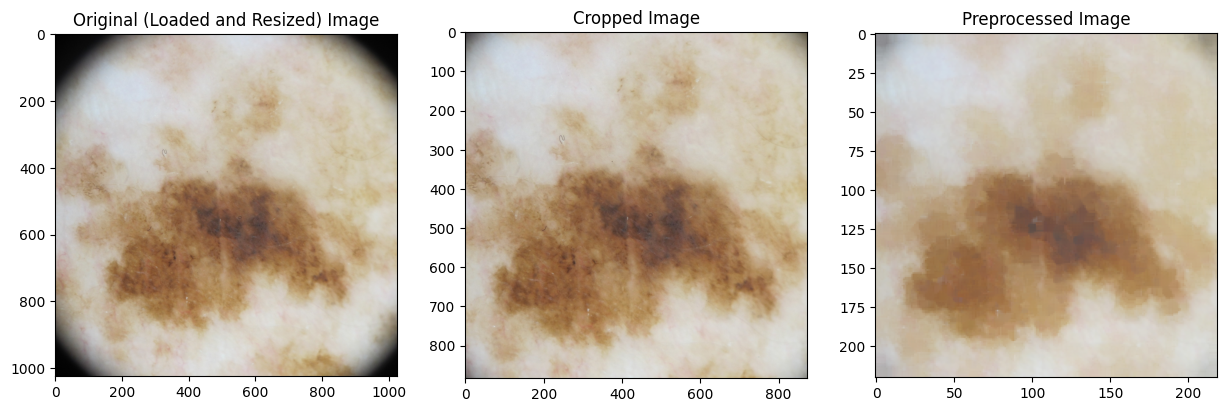

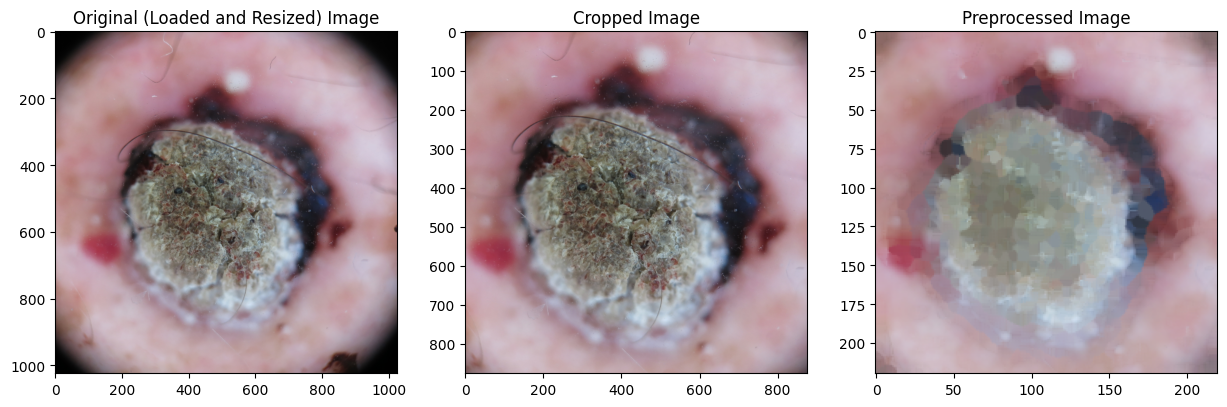

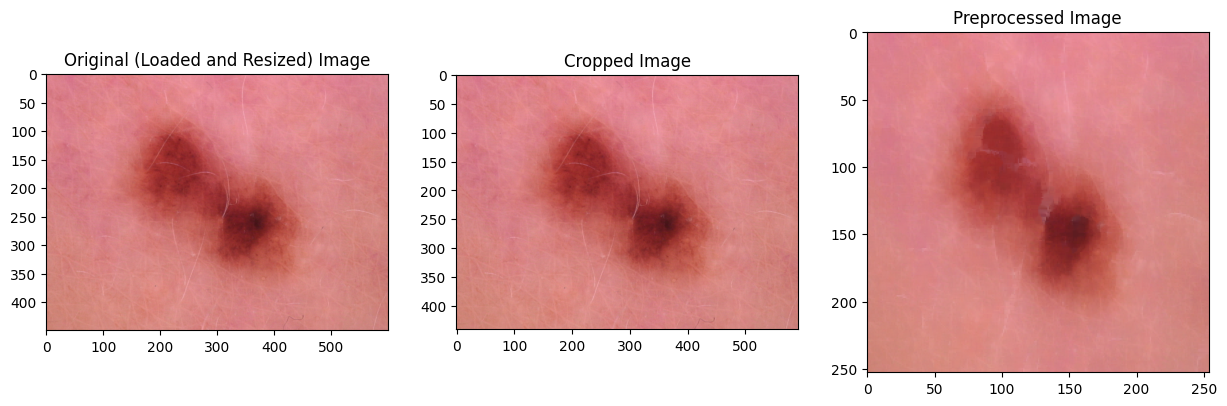

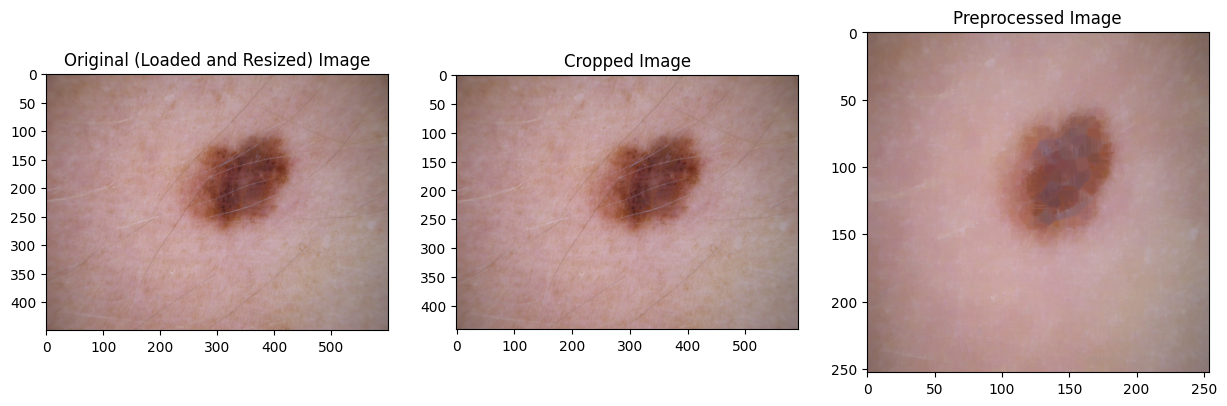

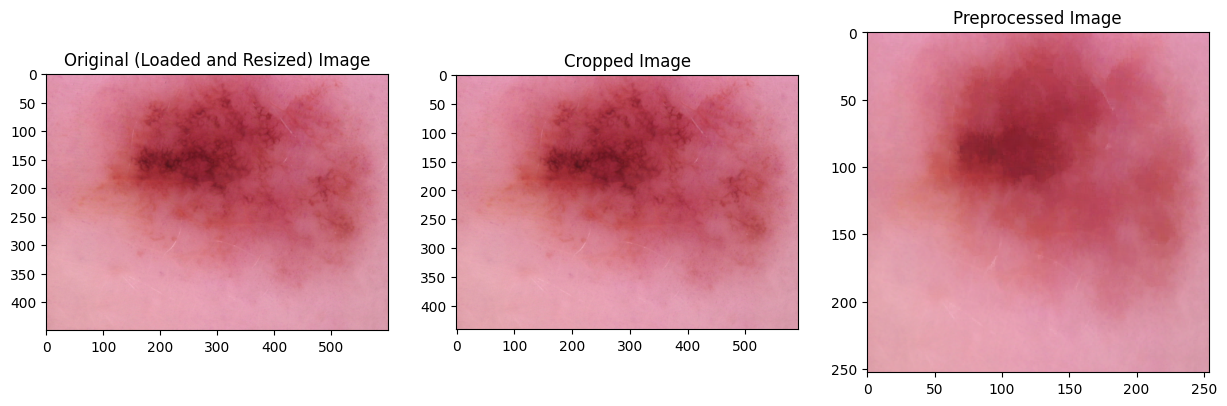

In [9]:
first_six_images = tr_df.head(6)

# Display original (loaded and resized), cropped, and preprocessed images
for index, row in first_six_images.iterrows():
    original_img = Image.open(row["tr_img_file"])
    cropped_img = vignette_removal(np.array(original_img), threshold=50)
    
    plt.figure(figsize=(15, 5))
    
    # Original (Loaded and Resized) Image
    plt.subplot(1, 3, 1)
    plt.title("Original (Loaded and Resized) Image")
    plt.imshow(original_img)
    
    # Cropped Image
    plt.subplot(1, 3, 2)
    plt.title("Cropped Image")
    plt.imshow(cropped_img)
    
    # Preprocessed Image
    plt.subplot(1, 3, 3)
    plt.title("Preprocessed Image")
    plt.imshow(row["preprocessed_img"])
    
    plt.show()

In [10]:
# Paths to your image directories
val_nevus = "val/nevus"
val_others = "val/others"

# Initialize lists to store validation data
val_image_names = []
val_image_files = []
val_preprocessed_imgs = []
val_gtruth = []

# Process all images for Nevus in the validation set (groundtruth = 0)
for val_nevus_img in tqdm(os.listdir(val_nevus), desc="Nevus"):
    val_img_path = os.path.join(val_nevus, val_nevus_img)
    val_original_img = np.array(load_and_resize_image(val_img_path))
    val_cropped_img = vignette_removal(val_original_img, threshold=50)
    val_hair_removed_img = remove_hair(val_cropped_img)
    val_preprocessed_imgs.append(val_hair_removed_img)
    val_image_names.append(val_nevus_img)
    val_image_files.append(val_img_path)
    val_gtruth.append(0)

# Process all images for Others in the validation set (groundtruth = 1)
for val_others_img in tqdm(os.listdir(val_others), desc="Others"):
    val_img_path = os.path.join(val_others, val_others_img)
    val_original_img = np.array(load_and_resize_image(val_img_path))
    val_cropped_img = vignette_removal(val_original_img, threshold=50)
    val_hair_removed_img = remove_hair(val_cropped_img)
    val_preprocessed_imgs.append(val_hair_removed_img)
    val_image_names.append(val_others_img)
    val_image_files.append(val_img_path)
    val_gtruth.append(1)

Others: 100%|██████████| 1865/1865 [03:04<00:00, 10.11it/s]


In [11]:
# Create a dataframe
val_data = {
    "val_img_name": val_image_names,
    "val_img_file": val_image_files,
    "val_preprocessed_img": val_preprocessed_imgs,
    "val_gtruth": val_gtruth
}

val_df = pd.DataFrame(val_data)
val_df = shuffle(val_df).reset_index(drop=True)

val_df.head()

val_img_name             val_img_file  \
0  bkl01909.jpg  val/others\bkl01909.jpg   
1  bcc02351.jpg  val/others\bcc02351.jpg   
2  ack00549.jpg  val/others\ack00549.jpg   
3  bcc02376.jpg  val/others\bcc02376.jpg   
4  mel02752.jpg  val/others\mel02752.jpg   

                                val_preprocessed_img  val_gtruth  
0  [[[173, 148, 180], [172, 145, 181], [173, 147,...           1  
1  [[[143, 122, 128], [142, 122, 126], [146, 122,...           1  
2  [[[186, 162, 137], [186, 160, 138], [186, 162,...           1  
3  [[[199, 199, 197], [198, 199, 194], [198, 199,...           1  
4  [[[168, 125, 138], [168, 126, 138], [168, 124,...           1

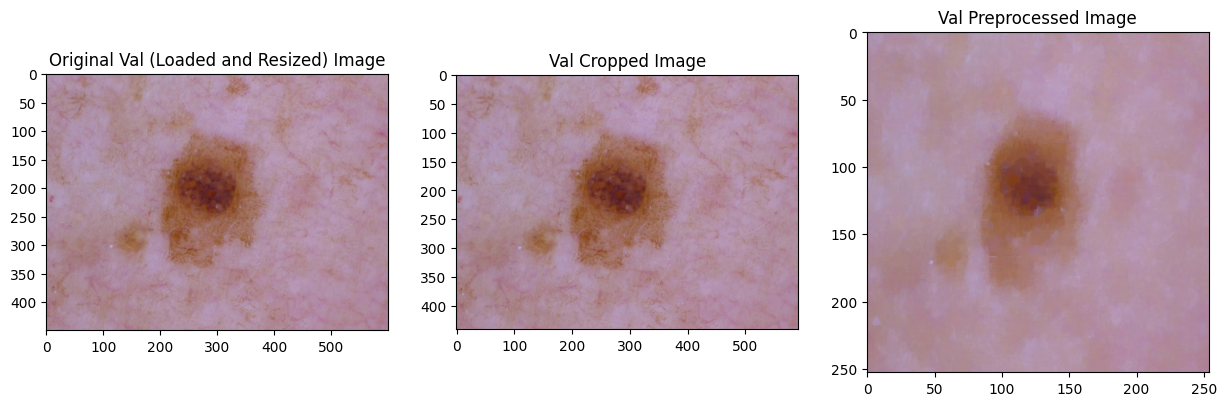

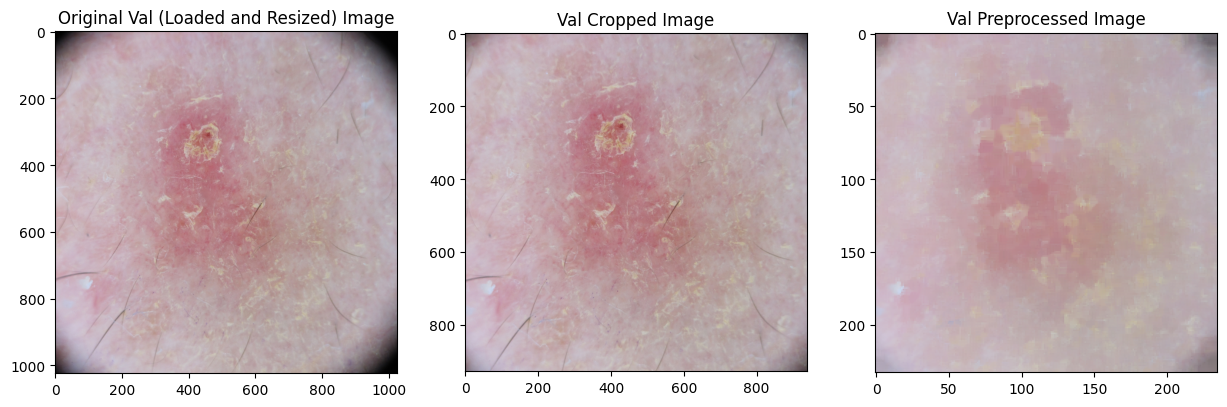

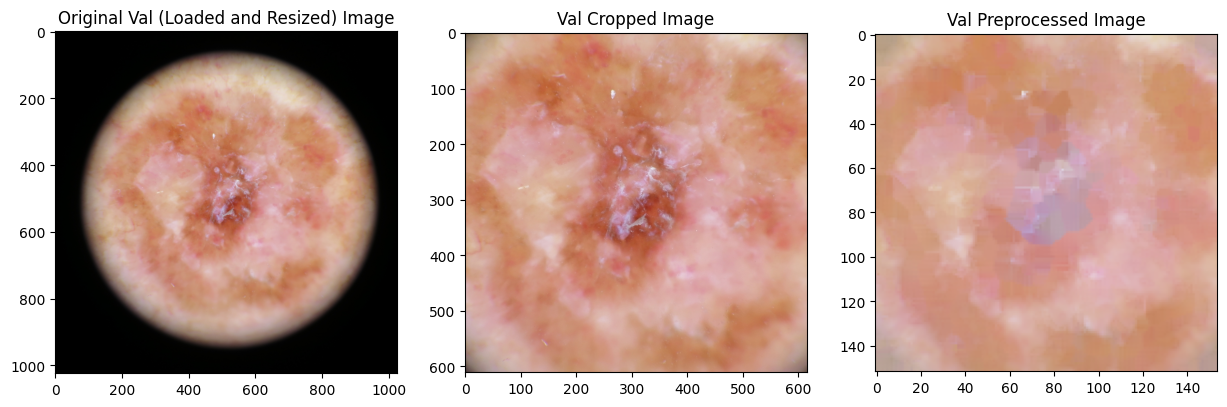

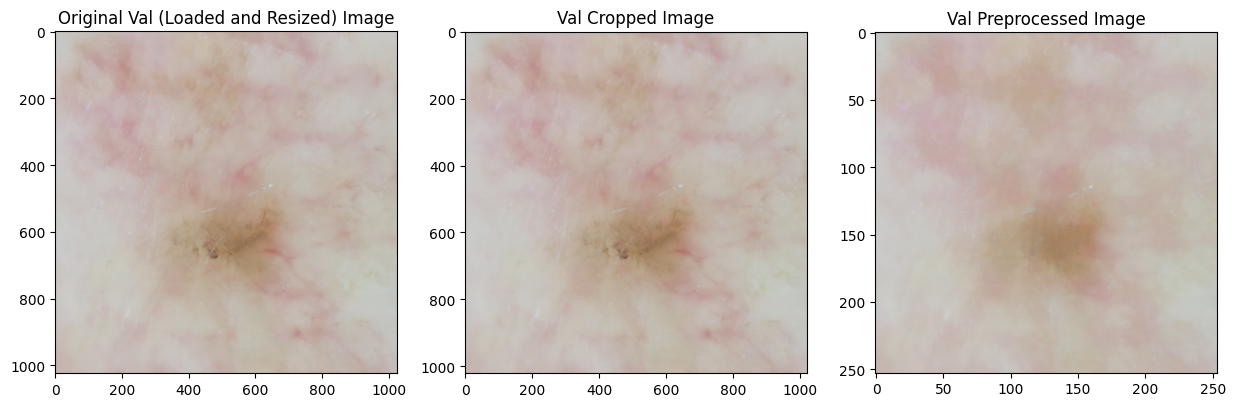

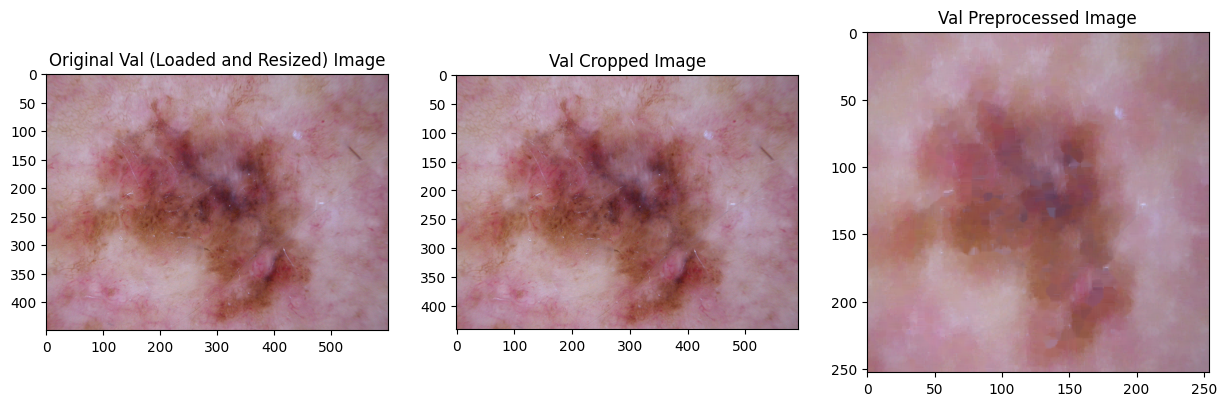

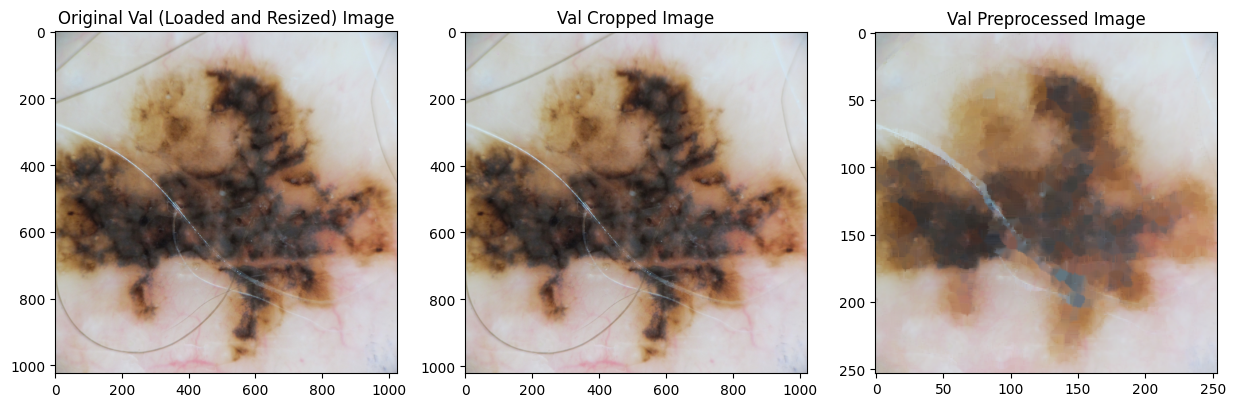

In [12]:
# Select the first 6 rows
val_first_six_images = val_df.head(6)

# Display original (loaded and resized), cropped, and preprocessed images
for index, row in val_first_six_images.iterrows():
    val_original_img = Image.open(row["val_img_file"])
    val_cropped_img = vignette_removal(np.array(val_original_img), threshold=50)
    
    plt.figure(figsize=(15, 5))
    
    # Original (Loaded and Resized) Image
    plt.subplot(1, 3, 1)
    plt.title("Original Val (Loaded and Resized) Image")
    plt.imshow(val_original_img)
    
    # Cropped Image
    plt.subplot(1, 3, 2)
    plt.title("Val Cropped Image")
    plt.imshow(val_cropped_img)
    
    # Preprocessed Image
    plt.subplot(1, 3, 3)
    plt.title("Val Preprocessed Image")
    plt.imshow(row["val_preprocessed_img"])
    
    plt.show()

In [16]:
intensity_features = pd.DataFrame()
intensity_features_list = []

glcm_features = pd.DataFrame()
glcm_features_list = []

lbp_features = pd.DataFrame()
lbp_features_list = []

shape_features = pd.DataFrame()
shape_features_list = []

for index, row in tr_df.iterrows():
    preprocessed_image = row['preprocessed_img']
    intensity_feature = extract_intensity_and_color_features(preprocessed_image)
    intensity_features_list.append(pd.DataFrame(intensity_feature, index=[0]))
    glcm_feature = extract_glcm_features(preprocessed_image)
    glcm_features_list.append(pd.DataFrame(glcm_feature, index=[0]))
    lbp_feature = extract_lbp_features(preprocessed_image)
    lbp_features_list.append(pd.DataFrame(lbp_feature, index=[0]))
    shape_feature = extract_shape_features(preprocessed_image)
    shape_features_list.append(pd.DataFrame(shape_feature, index=[0]))

intensity_features = pd.concat(intensity_features_list, ignore_index=True)
glcm_features = pd.concat(glcm_features_list, ignore_index=True)
lbp_features = pd.concat(lbp_features_list, ignore_index=True)
shape_features = pd.concat(shape_features_list, ignore_index=True)


# Combine intensity features with the original DataFrame
train_df = pd.concat([tr_df, intensity_features, glcm_features, lbp_features, shape_features], axis=1)
train_df.head()

tr_img_name                tr_img_file  \
0  mel01933.jpg  train/others\mel01933.jpg   
1  nev03107.jpg   train/nevus\nev03107.jpg   
2  bkl00049.jpg  train/others\bkl00049.jpg   
3  nev00417.jpg   train/nevus\nev00417.jpg   
4  mel01548.jpg  train/others\mel01548.jpg   

                                    preprocessed_img  tr_gtruth  \
0  [[[182, 150, 159], [182, 151, 159], [180, 149,...          1   
1  [[[144, 144, 148], [143, 143, 148], [144, 144,...          0   
2  [[[142, 108, 105], [140, 106, 104], [141, 107,...          1   
3  [[[223, 134, 144], [226, 136, 147], [228, 138,...          0   
4  [[[128, 104, 94], [128, 102, 94], [128, 104, 9...          1   

   mean_intensity  std_intensity  max_intensity  min_intensity      mean_r  \
0      186.382702      22.847461            251            115  210.870428   
1      174.127626      40.898041            232             56  192.897966   
2      153.482920      35.807173            239             37  165.183409   
3      151.253224      48.426854            242             27  210.166568   
4      151.948834      26.919958            211             53  176.729731   

       mean_g  ...   area  circularity  compactness  hu_moments_1  \
0  170.900977  ...  195.0     0.018328    54.560577      1.033760   
1  175.530988  ...   33.0     0.004585   218.094305      5.980627   
2  144.107975  ...  220.5     0.076152    13.131706      0.329345   
3  121.791136  ...   16.5     0.003986   250.857645      9.259346   
4  140.948617  ...   26.5     0.007179   139.300890     12.970897   

   hu_moments_2  hu_moments_3  hu_moments_4   hu_moments_5  hu_moments_6  \
0      0.432565      1.067680      2.614393       4.367002      1.701381   
1     22.969546     12.247965      2.551375      13.376580      3.392626   
2      0.015733      0.020502      0.001156      -0.000006      0.000024   
3     63.446953     11.123478      6.047337      44.168346     40.610796   
4    128.487592   1053.605271    498.358956  349408.925705   3505.999455   

   hu_moments_7  
0 -9.064769e-02  
1 -4.948122e+00  
2  7.008126e-07  
3  2.256428e+01  
4  9.122255e+04  

[5 rows x 175 columns]

In [17]:
val_intensity_features = pd.DataFrame()
val_intensity_features_list = []

val_glcm_features = pd.DataFrame()
val_glcm_features_list = []

val_lbp_features = pd.DataFrame()
val_lbp_features_list = []

val_shape_features = pd.DataFrame()
val_shape_features_list = []

for index, row in val_df.iterrows():
    val_preprocessed_image = row['val_preprocessed_img']
    intensity_val_feature = extract_intensity_and_color_features(val_preprocessed_image)
    glcm_val_feature = extract_glcm_features(val_preprocessed_image)
    lbp_val_feature = extract_lbp_features(val_preprocessed_image)
    val_intensity_features_list.append(pd.DataFrame(intensity_val_feature, index=[0]))
    val_glcm_features_list.append(pd.DataFrame(glcm_val_feature, index=[0]))
    val_lbp_features_list.append(pd.DataFrame(lbp_val_feature, index=[0]))
    shape_val_feature = extract_shape_features(val_preprocessed_image)
    val_shape_features_list.append(pd.DataFrame(shape_val_feature, index=[0]))

val_intensity_features = pd.concat(val_intensity_features_list, ignore_index=True)
val_glcm_features = pd.concat(val_glcm_features_list, ignore_index=True)
val_lbp_features = pd.concat(val_lbp_features_list, ignore_index=True)
val_shape_features = pd.concat(val_shape_features_list, ignore_index=True)

# Combine intensity features with the original DataFrame
validation_df = pd.concat([val_df, val_intensity_features, val_glcm_features, val_lbp_features, val_shape_features], axis=1)
validation_df.head()

val_img_name             val_img_file  \
0  bkl01909.jpg  val/others\bkl01909.jpg   
1  bcc02351.jpg  val/others\bcc02351.jpg   
2  ack00549.jpg  val/others\ack00549.jpg   
3  bcc02376.jpg  val/others\bcc02376.jpg   
4  mel02752.jpg  val/others\mel02752.jpg   

                                val_preprocessed_img  val_gtruth  \
0  [[[173, 148, 180], [172, 145, 181], [173, 147,...           1   
1  [[[143, 122, 128], [142, 122, 126], [146, 122,...           1   
2  [[[186, 162, 137], [186, 160, 138], [186, 162,...           1   
3  [[[199, 199, 197], [198, 199, 194], [198, 199,...           1   
4  [[[168, 125, 138], [168, 126, 138], [168, 124,...           1   

   mean_intensity  std_intensity  max_intensity  min_intensity      mean_r  \
0      154.316854      24.719289            211             22  173.445038   
1      176.402563      16.549300            235             99  189.985736   
2      170.050439      33.475050            234             85  210.289217   
3      182.707816      15.687546            211             94  194.645343   
4      143.761046      30.894117            238             56  169.833307   

       mean_g  ...  area  circularity  compactness  hu_moments_1  \
0  137.475009  ...   9.5     0.012262    81.550832      5.295978   
1  167.929121  ...   8.5     0.009103   109.859047     14.081869   
2  157.600692  ...  93.0     0.175523     5.697259      0.195057   
3  181.126809  ...   1.0     0.107171     9.330843      0.555556   
4  126.582164  ...  27.0     0.026776    37.347406      3.505604   

   hu_moments_2  hu_moments_3  hu_moments_4  hu_moments_5  hu_moments_6  \
0     22.432022     20.054331      2.391493 -1.552925e+01    -10.919637   
1    185.745414    270.019808    144.557816  2.785547e+04   1532.417016   
2      0.000928      0.002091      0.000061 -1.676590e-08     -0.000001   
3      0.197531      0.008573      0.001660 -6.261278e-06     -0.000738   
4     11.586964     42.251140     43.548494  1.868007e+03    147.792610   

   hu_moments_7  
0 -5.756391e+00  
1  6.305079e+03  
2  1.401917e-08  
3  1.111056e-13  
4 -2.447763e+00  

[5 rows x 175 columns]

In [18]:
train_features = train_df.drop(columns=['tr_img_name', 'tr_img_file', 'preprocessed_img', 'tr_gtruth'])
train_labels = train_df['tr_gtruth']

validation_features = validation_df.drop(columns=['val_img_name', 'val_img_file', 'val_preprocessed_img', 'val_gtruth'])
validation_labels = validation_df['val_gtruth']

In [19]:
# Define features and labels for training
X_train = train_features
y_train = train_labels

# Define features and labels for validation
X_val = validation_features
y_val = validation_labels

# Standardize the data
X_train_scaler = StandardScaler().fit_transform(X_train)
X_val_scaler = StandardScaler().fit_transform(X_val)

In [21]:
# Define classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
logreg_classifier = LogisticRegression(random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
nb_classifier = GaussianNB()

# Combine classifiers in a dictionary
classifiers = {
    'Random Forest': rf_classifier,
    'SVM': svm_classifier,
    'k-NN': knn_classifier,
    'Logistic Regression': logreg_classifier,
    'AdaBoost': adaboost_classifier,
    'Naive Bayes': nb_classifier
}

# Perform 10-fold cross-validation and predictions for each classifier
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_results = cross_val_score(clf, X_train_scaler, y_train, cv=skf)
    
    # Print cross-validation results
    print(f"\nClassifier: {clf_name}")
    print("Cross-validation Results:", cv_results)
    print("Average Cross-validation Accuracy:", np.mean(cv_results))
    
    # Fit the model on the entire training set (no need for additional scaling)
    clf.fit(X_train_scaler, y_train)
    
    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_scaler)
    
    # Evaluate the model
    acc_train = accuracy_score(y_train, clf.predict(X_train_scaler))
    acc_val = accuracy_score(y_val, y_pred_val)
    
    print("\nEvaluation on Validation Set:")
    print("Training Accuracy:", acc_train)
    print("Validation Accuracy:", acc_val)
    
    # Print confusion matrix for validation set
    print("\nConfusion Matrix (Validation Set):")
    print(confusion_matrix(y_val, y_pred_val))
    
    # Print classification report for validation set
    print("\nClassification Report (Validation Set):")
    print(classification_report(y_val, y_pred_val))


Classifier: Random Forest
Cross-validation Results: [0.83157895 0.80394737 0.81381579 0.80263158 0.80131579 0.79526004
 0.81764319 0.81040158 0.81764319 0.81500987]
Average Cross-validation Accuracy: 0.8109247340701986

Evaluation on Validation Set:
Training Accuracy: 0.9999341888779204
Validation Accuracy: 0.8108535300316122

Confusion Matrix (Validation Set):
[[1587  344]
 [ 374 1491]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1931
           1       0.81      0.80      0.81      1865

    accuracy                           0.81      3796
   macro avg       0.81      0.81      0.81      3796
weighted avg       0.81      0.81      0.81      3796


Classifier: SVM
Cross-validation Results: [0.82631579 0.80526316 0.80855263 0.80263158 0.81381579 0.80118499
 0.8321264  0.80184332 0.81040158 0.80776827]
Average Cross-validation Accuracy: 0.8109903502997124

Evaluation on Validation Set:

C:\Users\sulei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sulei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Classifier: Logistic Regression
Cross-validation Results: [0.80526316 0.7875     0.79605263 0.78552632 0.80986842 0.78670178
 0.80645161 0.79789335 0.79591837 0.7919684 ]
Average Cross-validation Accuracy: 0.7963144035203215


C:\Users\sulei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Evaluation on Validation Set:
Training Accuracy: 0.8004606778545574
Validation Accuracy: 0.8003161222339304

Confusion Matrix (Validation Set):
[[1556  375]
 [ 383 1482]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1931
           1       0.80      0.79      0.80      1865

    accuracy                           0.80      3796
   macro avg       0.80      0.80      0.80      3796
weighted avg       0.80      0.80      0.80      3796


Classifier: AdaBoost
Cross-validation Results: [0.78881579 0.76776316 0.78355263 0.77171053 0.78157895 0.76300197
 0.78472679 0.78736011 0.78933509 0.78341014]
Average Cross-validation Accuracy: 0.7801255154014067

Evaluation on Validation Set:
Training Accuracy: 0.7903915761763738
Validation Accuracy: 0.7924130663856691

Confusion Matrix (Validation Set):
[[1579  352]
 [ 436 1429]]

Classification Report (Validation Set):
              precision    recal

In [23]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define classifiers and their respective hyperparameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'XGBoost': (xgb.XGBClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 10],
    }),
}

# Dictionary to store best models and parameters
best_models = {}

# Perform Grid Search for each classifier
for clf_name, (clf, param_grid) in classifiers.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize Grid Search
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=skf, scoring='accuracy', verbose=2, n_jobs=-1)

    # Perform Grid Search and monitor the progress with tqdm
    with tqdm(total=100, desc=f"Grid Search - {clf_name}", position=0, leave=True) as pbar:
        grid_search.fit(X_train_scaler, y_train)
        pbar.update(100)

    # Store the best model and parameters
    best_models[clf_name] = grid_search.best_estimator_

# Evaluate the best models
for clf_name, best_model in best_models.items():
    best_model.fit(X_train_scaler, y_train)
    y_pred_val = best_model.predict(X_val_scaler)
    acc_train = accuracy_score(y_train, best_model.predict(X_train_scaler))
    acc_val = accuracy_score(y_val, y_pred_val)

    print(f"\nEvaluation on Validation Set - {clf_name}:")
    print("Training Accuracy:", acc_train)
    print("Validation Accuracy:", acc_val)
    print("\nBest Parameters:", best_models[clf_name])
    print("\n")

Grid Search - Random Forest:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Grid Search - k-NN:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


Grid Search - Logistic Regression:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\sulei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Grid Search - AdaBoost:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


Grid Search - Naive Bayes:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Grid Search - XGBoost:   0%|          | 0/100 [00:00<?, ?it/s]

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Grid Search - XGBoost: 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]



Evaluation on Validation Set - Random Forest:
Training Accuracy: 1.0
Validation Accuracy: 0.815595363540569

Best Parameters: RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)



Evaluation on Validation Set - k-NN:
Training Accuracy: 0.8448831852583086
Validation Accuracy: 0.7924130663856691

Best Parameters: KNeighborsClassifier(n_neighbors=7)




C:\Users\sulei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Evaluation on Validation Set - Logistic Regression:
Training Accuracy: 0.8008555445870352
Validation Accuracy: 0.8016332982086407

Best Parameters: LogisticRegression(C=10, random_state=42)



Evaluation on Validation Set - AdaBoost:
Training Accuracy: 0.8138203356367226
Validation Accuracy: 0.773709167544784

Best Parameters: AdaBoostClassifier(n_estimators=200, random_state=42)



Evaluation on Validation Set - Naive Bayes:
Training Accuracy: 0.70714050674564
Validation Accuracy: 0.7012644889357218

Best Parameters: GaussianNB()



Evaluation on Validation Set - XGBoost:
Training Accuracy: 1.0
Validation Accuracy: 0.8208640674394099

Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

# Define individual classifiers
random_forest = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
xgboost = xgb.XGBClassifier(n_estimators=200, max_depth=10, random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[
    ('Random Forest', random_forest),
    ('XGBoost', xgboost)
], voting='hard')

# Perform 10-fold cross-validation
cv_scores = []

with tqdm(total=10, desc="Cross-Validation", position=0, leave=True) as pbar:
    for _ in range(10):
        scores = cross_val_score(ensemble, X_train_scaler, y_train, cv=10, scoring='accuracy')
        cv_scores.extend(scores)
        pbar.update(1)

# Print the cross-validation results
print("Cross-Validation Results:")
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: {score:.4f}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

# Fit the ensemble model on the training data
ensemble.fit(X_train_scaler, y_train)

# Predict on the validation set
y_pred_val = ensemble.predict(X_val_scaler)

# Calculate and print the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy on Validation Set: {accuracy_val:.4f}")

Cross-Validation: 100%|██████████| 10/10 [4:05:01<00:00, 1470.15s/it] 


Cross-Validation Results:
Fold 1: 0.8092
Fold 2: 0.8059
Fold 3: 0.8204
Fold 4: 0.8257
Fold 5: 0.8250
Fold 6: 0.8183
Fold 7: 0.8334
Fold 8: 0.8190
Fold 9: 0.8275
Fold 10: 0.8229
Fold 11: 0.8092
Fold 12: 0.8059
Fold 13: 0.8204
Fold 14: 0.8257
Fold 15: 0.8250
Fold 16: 0.8183
Fold 17: 0.8334
Fold 18: 0.8190
Fold 19: 0.8275
Fold 20: 0.8229
Fold 21: 0.8092
Fold 22: 0.8059
Fold 23: 0.8204
Fold 24: 0.8257
Fold 25: 0.8250
Fold 26: 0.8183
Fold 27: 0.8334
Fold 28: 0.8190
Fold 29: 0.8275
Fold 30: 0.8229
Fold 31: 0.8092
Fold 32: 0.8059
Fold 33: 0.8204
Fold 34: 0.8257
Fold 35: 0.8250
Fold 36: 0.8183
Fold 37: 0.8334
Fold 38: 0.8190
Fold 39: 0.8275
Fold 40: 0.8229
Fold 41: 0.8092
Fold 42: 0.8059
Fold 43: 0.8204
Fold 44: 0.8257
Fold 45: 0.8250
Fold 46: 0.8183
Fold 47: 0.8334
Fold 48: 0.8190
Fold 49: 0.8275
Fold 50: 0.8229
Fold 51: 0.8092
Fold 52: 0.8059
Fold 53: 0.8204
Fold 54: 0.8257
Fold 55: 0.8250
Fold 56: 0.8183
Fold 57: 0.8334
Fold 58: 0.8190
Fold 59: 0.8275
Fold 60: 0.8229
Fold 61: 0.8092
Fold 62

In [29]:
import joblib

# Save the XGBoost model
processed_xgboost_model = best_models['XGBoost']
joblib.dump(processed_xgboost_model, 'Pxgboost_model.pkl')

# Save the Random Forest model
processed_random_forest_model = best_models['Random Forest']
joblib.dump(processed_random_forest_model, 'Prandom_forest_model.pkl')

['Prandom_forest_model.pkl']